In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')
train.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_21312\3032450813.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df = pd.merge(train, store, on='Store', how='left')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [6]:
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [7]:
# convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [8]:
df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [9]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


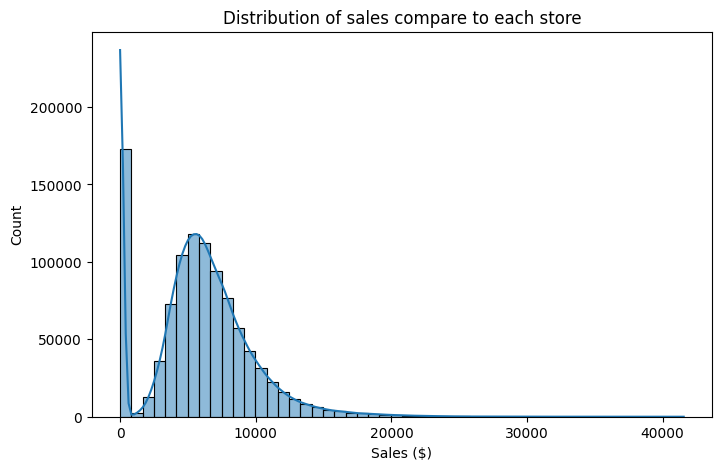

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Sales',bins=50, kde=True)
plt.title("Distribution of sales compare to each store")
plt.xlabel("Sales ($)")
plt.show()

In [11]:
df.shape

(1017209, 18)

In [12]:
df.groupby('Store')['Sales'].mean().sort_values(ascending=False)

Store
262     20718.515924
817     18108.139066
562     17969.556263
1114    17200.196391
251     15814.087049
            ...     
841      2461.395966
208      2443.791932
198      2407.933121
543      2313.468153
307      2244.503185
Name: Sales, Length: 1115, dtype: float64

In [13]:
# Conclusion: Store number 262 have the highest average sale of all time

In [14]:
df.groupby('DayOfWeek')['Sales'].mean().sort_values(ascending=False)

DayOfWeek
1    7809.044510
2    7005.244467
5    6723.274305
3    6555.884138
4    6247.575913
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

In [15]:
# correlation between customers and sales
correlated = df['Customers'].corr(df['Sales'])
print(correlated)

0.8947107733016959


<Axes: xlabel='Customers', ylabel='Sales'>

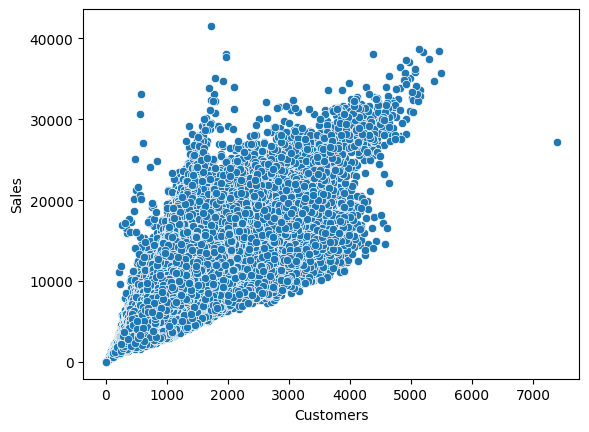

In [16]:
sns.scatterplot(data=df, x='Customers', y='Sales')

In [17]:
store_262= df[df['Store'] == 262]
store_262.groupby('Sales')['Customers'].sum()

Sales
13210    2320
13431    2255
13738    2507
14057    2462
14289    2497
         ... 
37376    4916
37403    5297
38367    5192
38484    5458
38722    5132
Name: Customers, Length: 909, dtype: int64

In [18]:
df.groupby('Promo')['Sales'].mean()


Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

<Axes: xlabel='Promo', ylabel='Sales'>

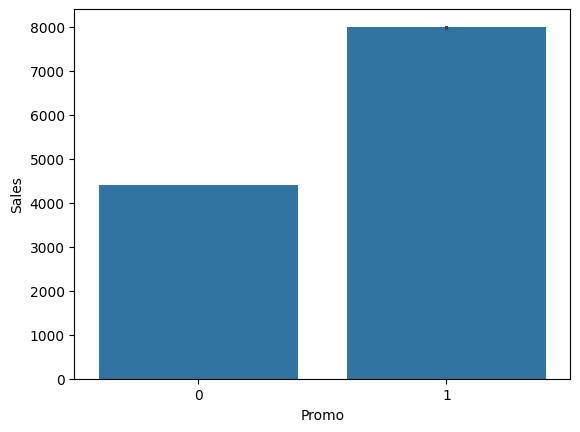

In [19]:
df[['Promo', "Sales"]].corr()
sns.barplot(data=df,x='Promo', y='Sales')

<Axes: ylabel='DayOfWeek'>

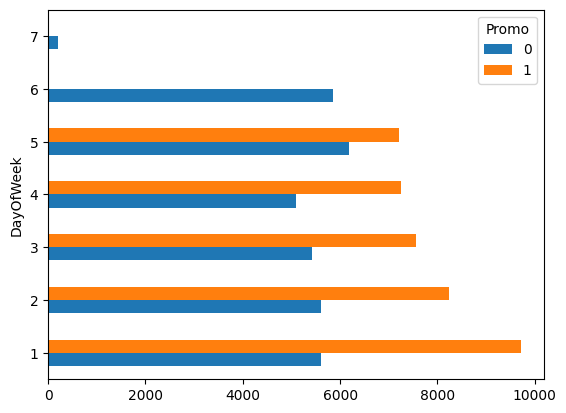

In [20]:
df.groupby(['DayOfWeek', 'Promo'])['Sales'].mean().unstack().plot(kind='barh')


In [21]:
pivot_promo_sale = df.pivot_table(index='Store', columns='Promo', values='Sales',aggfunc='mean').sort_values(by ='Store', ascending=False)
pivot_promo_sale['Avg_Sale_with_promo'] = pivot_promo_sale[1] - pivot_promo_sale[0]
pivot_promo_sale.round(2)

Promo,0,1,Avg_Sale_with_promo
Store,,,
1115,4082.22,7073.27,2991.05
1114,14477.74,21601.50,7123.75
1113,4400.36,7320.09,2919.72
1112,5975.54,12490.36,6514.83
1111,3073.49,6395.29,3321.81
...,...,...,...
5,2582.27,5944.27,3362.00
4,6568.94,10370.51,3801.57
3,3967.60,8608.67,4641.07


In [22]:

pivot_promo_sale.sort_values(by='Avg_Sale_with_promo', ascending=False).round(2).head(10)

Promo,0,1,Avg_Sale_with_promo
Store,,,
817,14043.34,24679.57,10636.23
261,6694.37,16478.11,9783.74
544,8329.31,17072.36,8743.04
1014,6853.45,15334.43,8480.98
963,5758.71,13982.88,8224.18
788,11869.65,19927.80,8058.15
335,10306.77,18175.53,7868.75
251,12810.09,20670.54,7860.45
513,12155.92,19937.94,7782.01


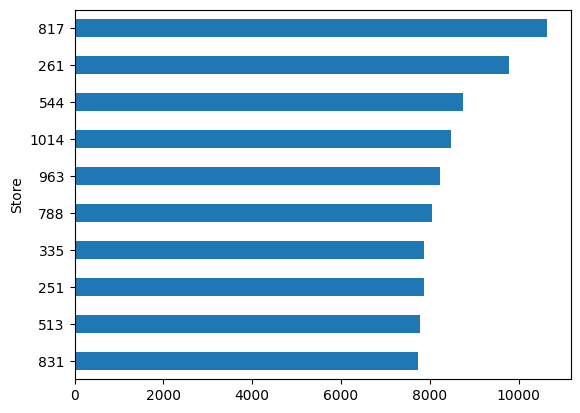

In [30]:
top_10_store_with_promo = pivot_promo_sale.sort_values(by='Avg_Sale_with_promo', ascending=False).round(2).head(10)
top_10_store_with_promo = top_10_store_with_promo.drop(columns=[1,0])
top_10_store_with_promo.plot(kind='barh',legend=False)
plt.gca().invert_yaxis()

In [31]:
# Schooldays and hollydays

df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

<Axes: ylabel='StateHoliday'>

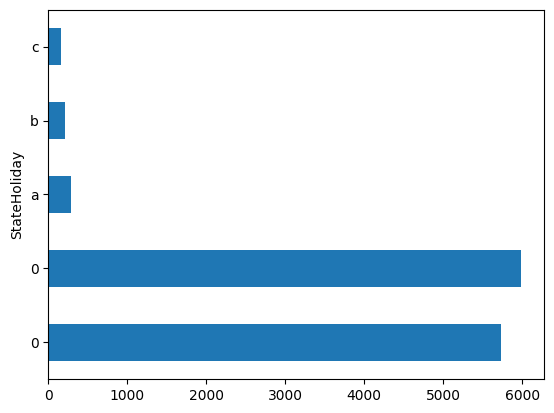

In [33]:
#StateHoliday
df.groupby('StateHoliday')['Sales'].mean().plot(kind='barh')

<Axes: ylabel='SchoolHoliday'>

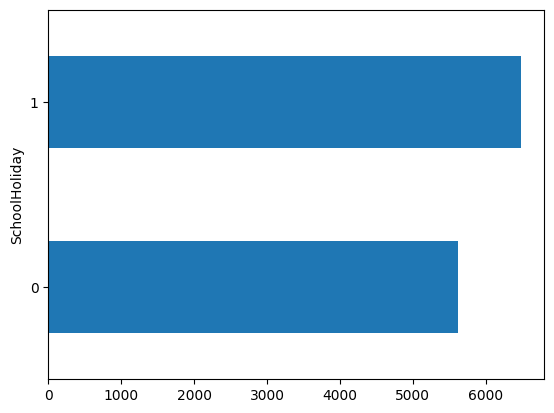

In [34]:
#Schoolholiday

df.groupby('SchoolHoliday')['Sales'].mean().plot(kind='barh')

In [37]:
df.groupby('SchoolHoliday')['Sales'].mean()

SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64

In [38]:
# Comptitions Effect on sales
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [39]:
df['CompetitionDistance'][:10]

0     1270.0
1      570.0
2    14130.0
3      620.0
4    29910.0
5      310.0
6    24000.0
7     7520.0
8     2030.0
9     3160.0
Name: CompetitionDistance, dtype: float64

In [40]:
df['CompetitionOpenSinceMonth'][:10]

0     9.0
1    11.0
2    12.0
3     9.0
4     4.0
5    12.0
6     4.0
7    10.0
8     8.0
9     9.0
Name: CompetitionOpenSinceMonth, dtype: float64

In [42]:
df['CompetitionOpenSinceYear'][:10]

0    2008.0
1    2007.0
2    2006.0
3    2009.0
4    2015.0
5    2013.0
6    2013.0
7    2014.0
8    2000.0
9    2009.0
Name: CompetitionOpenSinceYear, dtype: float64

In [ ]:
df['CompetitionDistance'].value_counts()

CompetitionDistance
250.0      11120
350.0       7536
50.0        7536
1200.0      7374
190.0       7352
           ...  
10570.0      758
7340.0       758
2910.0       758
17290.0      758
12020.0      758
Name: count, Length: 654, dtype: int64

In [55]:
df.groupby('CompetitionDistance')['Sales'].mean().sort_values(ascending=False).head(10)

CompetitionDistance
1210.0     17969.556263
1530.0     14949.194268
860.0      14933.288747
1180.0     13432.499412
7680.0     11539.564756
870.0      10826.427813
2630.0     10812.739915
11810.0    10714.142251
15340.0    10433.380042
1910.0      9717.199045
Name: Sales, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_21312\936325115.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='CompetitionDistanceGroup', y='Sales', estimator='mean', ci=None)


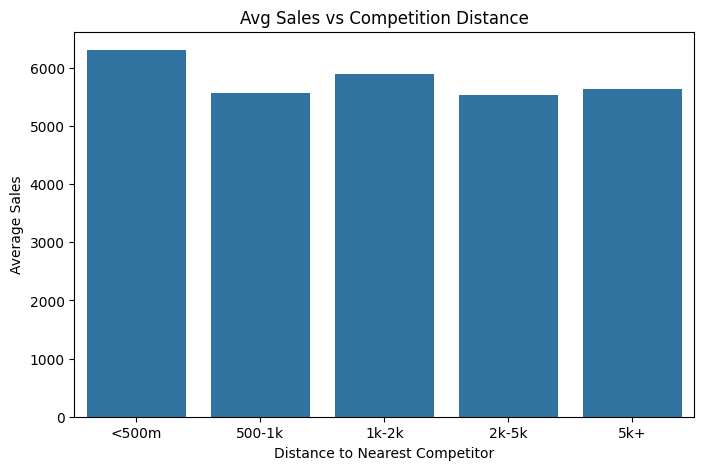

In [56]:
# Create Distance Groups
df['CompetitionDistanceGroup'] = pd.cut(df['CompetitionDistance'],
                                        bins=[-1, 500, 1000, 2000, 5000, np.inf],
                                        labels=['<500m', '500-1k', '1k-2k', '2k-5k', '5k+'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='CompetitionDistanceGroup', y='Sales', estimator='mean', ci=None)
plt.title("Avg Sales vs Competition Distance")
plt.ylabel("Average Sales")
plt.xlabel("Distance to Nearest Competitor")
plt.show()


In [57]:
# Does having no competition data (i.e., NaN) relate to higher sales?
df['HasCompetition'] = df['CompetitionDistance'].notna().astype(int)

# Compare average sales
df.groupby('HasCompetition')['Sales'].mean()


HasCompetition
0    4535.892884
1    5777.042614
Name: Sales, dtype: float64

In [ ]:
#Surprisingly, stores with nearby competition have higher average sales. 
# This may be due to their prime locations, stronger performance, or incomplete data for isolated stores.
# Further investigation is needed before drawing causal conclusions

In [58]:
df['Promo2'][:10]

0    0
1    1
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Promo2, dtype: int64

In [59]:
df.groupby('Promo2')['Sales'].mean()

Promo2
0    6124.710161
1    5423.718218
Name: Sales, dtype: float64

In [60]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionDistanceGroup',
       'HasCompetition'],
      dtype='object')

In [62]:
df.to_csv("MergedData.csv")